In [0]:
!pip install tensorflow-gpu

     |████████████████████████████████| 380.8MB 42kB/s 
     |████████████████████████████████| 3.8MB 51.2MB/s 
     |████████████████████████████████| 450kB 46.1MB/s 
ERROR: tensorflow 1.15.0 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 2.0.0 which is incompatible.
ERROR: tensorflow 1.15.0 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 2.0.1 which is incompatible.
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1


In [3]:
import tensorflow as tf
from keras.layers import Input, Activation, Dense
from keras.models import Model, Sequential
from keras.optimizers import SGD
import matplotlib.pyplot as plt

import numpy as np

import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [0]:
# Generate data from -20, -19.75, -19.5, .... , 20
train_x = np.arange(-20, 20, 0.25)

# Calculate Target : sqrt(2x^2 + 1)
train_y = np.sqrt((2*train_x**2)+1)

In [5]:
# Create Network
inputs = tf.keras.Input(shape=(1,))
h_layer = tf.keras.layers.Dense(8, activation='relu')(inputs)
h_layer = tf.keras.layers.Dense(4, activation='relu')(h_layer)
outputs = tf.keras.layers.Dense(1, activation='linear')(h_layer)
model = tf.keras.Model(inputs=inputs, outputs=outputs)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
# Optimizer / Update Rule
sgd = tf.keras.optimizers.SGD(lr=0.001)

# Compile the model with Mean Squared Error Loss
model.compile(optimizer=sgd, loss='mse')

In [7]:
# Train the network and save the weights after training
model.fit(train_x, train_y, batch_size=20, epochs=1000, verbose=1)

Train on 160 samples
Epoch 1/1000
160/160 [==============================] - 0s 687us/sample - loss: 45.4890
Epoch 2/1000
160/160 [==============================] - 0s 101us/sample - loss: 0.0146
Epoch 3/1000
160/160 [==============================] - 0s 77us/sample - loss: 0.0114
Epoch 4/1000
160/160 [==============================] - 0s 129us/sample - loss: 0.0112
Epoch 5/1000
160/160 [==============================] - 0s 131us/sample - loss: 0.0111
Epoch 6/1000
160/160 [==============================] - 0s 120us/sample - loss: 0.0111
Epoch 7/1000
160/160 [==============================] - 0s 86us/sample - loss: 0.0111
Epoch 8/1000
160/160 [==============================] - 0s 106us/sample - loss: 0.0114
Epoch 9/1000
160/160 [==============================] - 0s 87us/sample - loss: 0.0112
Epoch 10/1000
160/160 [==============================] - 0s 96us/sample - loss: 0.0111
Epoch 11/1000
160/160 [==============================] - 0s 81us/sample - loss: 0.0112
Epoch 12/1000
160/160 [=

f(26) =  [[36.612843]]


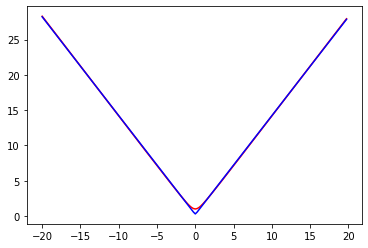

In [8]:
# Predict training data
predict = model.predict(np.array([26]))
print('f(26) = ', predict)

predict_y = model.predict(train_x)

# Draw target vs prediction
plt.plot(train_x, train_y, 'r')
plt.plot(train_x, predict_y, 'b')
plt.show()